In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Lets create the functions for performing the data preprocessing in the dataset 

In [42]:
def identify_categorical_columns(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype.name == "object":
            categorical_columns.append(col)
    return categorical_columns

def identify_date_time_columns(df):
    date_time_columns = []
    for col in df.columns:
        if pd.api.types.is_datetime_dtype(df[col]):
            date_time_columns.append(col)
    return date_time_columns

def handle_missing_values(df):
    # Impute missing values with the mean of the column.
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    return df

def handle_duplicates(df):
    # Drop duplicate rows.
    df.drop_duplicates(inplace=True)
    return df

def handle_outliers(df, threshold=3):
    # Identify outliers using the z-score method.
    for col in df.columns:
        if df[col].dtype.name in ["float64", "int64"]:
            df_z = df[col].apply(lambda x: (x - df[col].mean()) / df[col].std())
            df_outliers = df_z[abs(df_z) > threshold]
            df.drop(df_outliers.index, inplace=True)
    return df

def normalize_data(df):
    # Normalize the data using the MinMaxScaler.
    scaler = MinMaxScaler()
    df_norm = scaler.fit_transform(df)
    df_norm = pd.DataFrame(df_norm, columns=df.columns)
    return df_norm

def encode_data(df,categoriacal_columns):
    label=LabelEncoder()
    for i in categoriacal_columns:
        df[i]=label.fit_transform(df[i])
    return df
    
def handle_data(df):
    # Identify categorical columns.
    categorical_columns = identify_categorical_columns(df)
    # Identify date and time columns.
#     date_time_columns = identify_date_time_columns(df)
    # Handle missing values.
    df = encode_data(df, categorical_columns)
    df = handle_missing_values(df)
    # Handle duplicates.
#     df = handle_duplicates(df)
    # Handle outliers.
#     df = handle_outliers(df)
    # Normalize the data.
    df = normalize_data(df)
    # Encode categorical data.
    # Handle date and time data.
#     df = handle_date_time(df, date_time_columns)
    # Handle imbalance.
#     df = handle_imbalance(df, target_column)
    return df

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

Usage
The target variable is nothing but the Grade of the milk. It can be

Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

Inspiration
To leverage the benefits of machine learning in the dairy industry.

In [16]:
df=(pd
   .read_csv("/kaggle/input/milkquality/milknew.csv")
   )
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
df.shape

(1059, 8)

In [7]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [43]:
X=df.drop(['Grade'],axis=1)
df1=handle_data(X)

In [44]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [45]:
df1.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.846154,0.642857,1.0,1.0,1.0,1.0,0.400000
3,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
4,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000


##Features vs Label

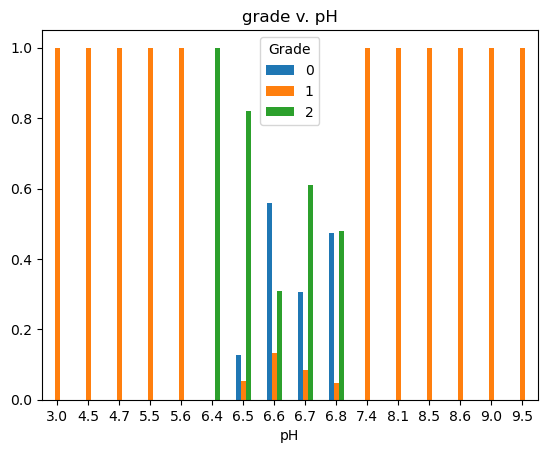

In [69]:
(df
.groupby(['pH'])
.Grade#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. pH', rot='horizontal')
);

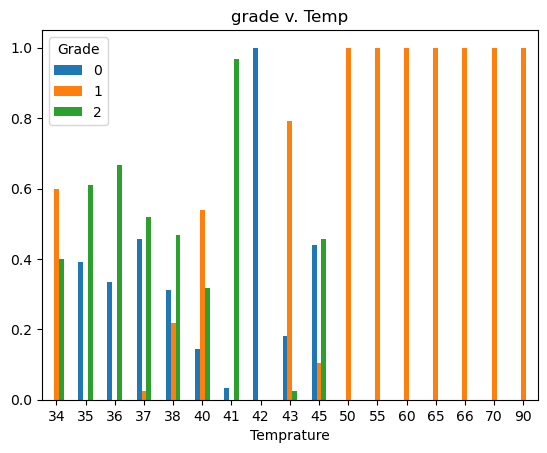

In [68]:
(df
.groupby(['Temprature'])
.Grade#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. Temp', rot='horizontal')
);

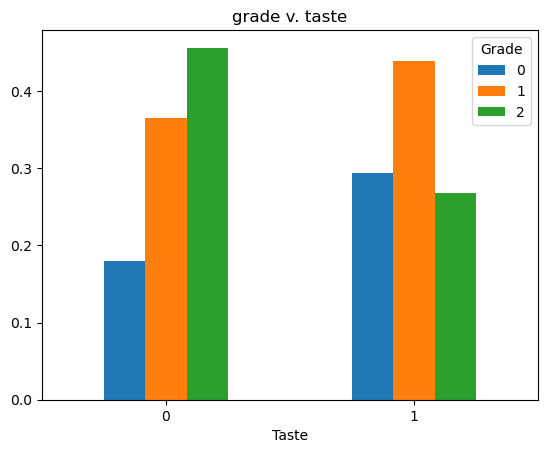

In [67]:
(df
.groupby(['Taste'])
.Grade#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. taste', rot='horizontal')
);

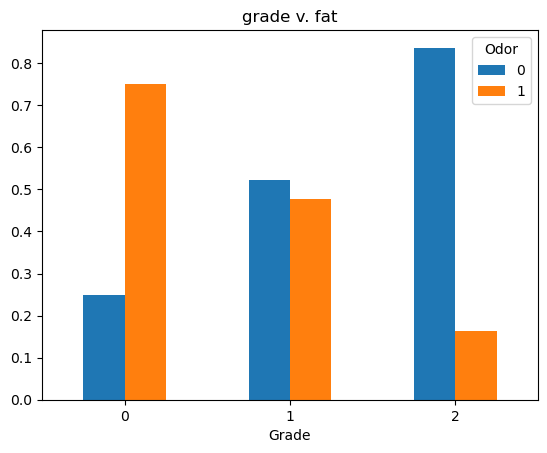

In [66]:
(df
.groupby(['Grade'])
.Odor#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. Odor', rot='horizontal')
);

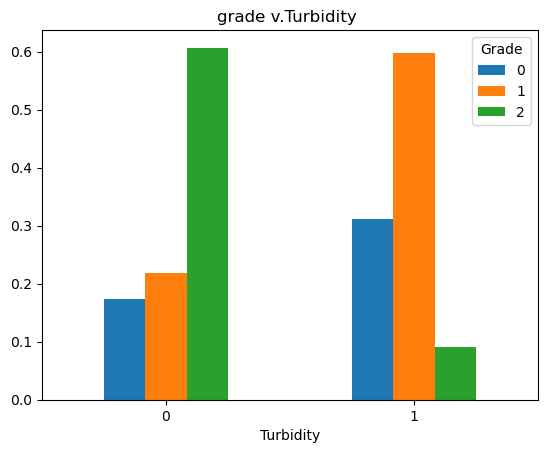

In [57]:

(df
.groupby(['Turbidity'])
.Grade #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v.Turbidity ', rot='horizontal')
);

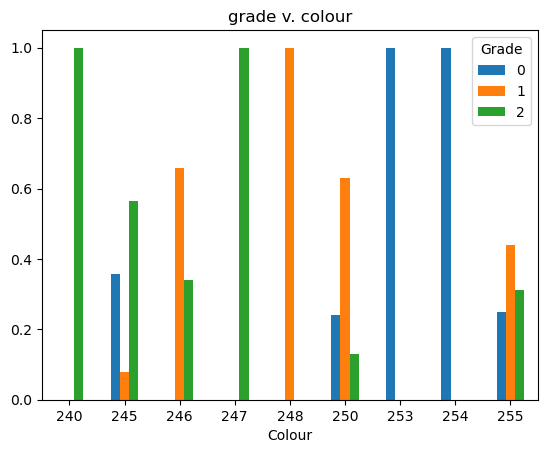

In [56]:

(df
.groupby(['Colour'])
.Grade #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. colour', rot='horizontal')
);

In [74]:

(df
.corr()
.style
.background_gradient(cmap="viridis", axis=None)
)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


Data Preprocessing and modelling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [47]:
lab=LabelEncoder()
df['Grade']=lab.fit_transform(df['Grade'])
df['Grade'].shape
# df1.shape

(1059,)

In [41]:
df.shape

(1059, 8)

In [39]:
df1.shape

(80, 7)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df1,
 df['Grade'],
 test_size=0.2,
random_state=42)


In [49]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [50]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        classifier.fit(X_train, Y_train)
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        count+=1
    return df_results

In [51]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

                     classifier  train_score  training_time
3  Gradient Boosting Classifier     1.000000            0.0
4                 Decision Tree     1.000000            0.0
5                 Random Forest     1.000000            0.0
1             Nearest Neighbors     0.996458            0.0
7                   Naive Bayes     0.946871            0.0
6                    Neural Net     0.920897            0.0
2                    Linear SVM     0.911452            0.0
0           Logistic Regression     0.804014            0.0


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
